In [1]:
import pyodbc

In [2]:
conn = pyodbc.connect(r'DSN=tekkredi;UID=yavuzs;PWD=18651438-155E-4450-859D-803181407D18')

In [3]:
import pandas as pd

In [4]:
df = pd.read_sql("select * from dbo.IndusTrain_Model", conn)

In [5]:
df.head()

,index,ca_customertransactionid,c_gender,ca_avgmonthlycanbepaid,ca_avgpayrollincome,ca_maxmonthlycanbepaid,ca_maxpayrollincome,ca_minmonthlycanbepaid,ca_minpayrollincome,ca_occupation,...,ctb_avg_months_90day_delinquent_last_18months,ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months,avg_ratio_totaldebt_to_creditlimit_last_3months,ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months,VAR_Inverse_of_ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months,VAR_Inverse_of_ctb_avg_months_90day_delinquent_last_18months,VAR_Log_of_ctb_avg_months_60day_delinquent_x_open_loan_x_personal_loan_last_6months,VAR_Log_of_avg_ratio_totaldebt_to_creditlimit_last_3months,VAR_Inverse_of_ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months,target_var
0,2243,{C0ECCA37-216A-41C5-8139-2400B19C8A6B},Female,750,1850,750,1850,750,1850,?zel Sekt?r ?cretli,...,0.0000,0.0000,0.741602,0.428571,2.333333,30.003,-2.302585,0.554806,72.992699,0
1,2244,{C0F69883-CBD4-4508-B483-0139CEC9C169},Female,250,1250,500,1500,0,1000,Emekli,...,0.0000,0.0137,0.828282,0.800000,1.250000,30.003,-2.302585,0.603377,72.992699,0
2,2245,{C101FE5A-C985-49F5-BBB9-1E9F85647618},Male,1500,1239,1500,1239,1500,1239,Emekli,...,0.2500,0.0137,0.880155,0.800000,1.250000,4.000,-2.302585,0.631354,72.992699,1
3,2246,{C110DC3F-FB6B-41C1-A49F-F035A48C7703},Male,2400,3850,2400,3850,2400,3850,Kamu ?cretli,...,0.0000,0.0000,0.522747,0.934064,1.070591,30.003,-2.302585,0.420516,72.992699,0
4,2247,{C1170BB3-ECCC-4DDA-A345-BB19855ECE97},Male,1750,1250,2000,1500,1500,1000,?zel Sekt?r ?cretli,...,0.0625,0.0000,0.713588,0.893691,1.118955,16.000,-2.302585,0.538589,72.992699,1


In [6]:
df['target_var']=df['target_var'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 32 columns):
index                                                                                                         2983 non-null object
ca_customertransactionid                                                                                      2983 non-null object
c_gender                                                                                                      2983 non-null object
ca_avgmonthlycanbepaid                                                                                        2983 non-null int64
ca_avgpayrollincome                                                                                           2983 non-null int64
ca_maxmonthlycanbepaid                                                                                        2983 non-null int64
ca_maxpayrollincome                                                                                           

In [13]:
df.describe()

,ca_avgmonthlycanbepaid,ca_avgpayrollincome,ca_maxmonthlycanbepaid,ca_maxpayrollincome,ca_minmonthlycanbepaid,ca_minpayrollincome,VAR_ca_score,ca_totalamount,VAR_ctb_average_months_on_time_x_creditcard_loan_last_3months,ctb_avg_months_60day_delinquent_x_open_loan_x_personal_loan_last_6months,ctb_avg_months_90day_delinquent_last_18months,ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months,avg_ratio_totaldebt_to_creditlimit_last_3months,ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months,VAR_Inverse_of_ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months,VAR_Inverse_of_ctb_avg_months_90day_delinquent_last_18months,VAR_Log_of_ctb_avg_months_60day_delinquent_x_open_loan_x_personal_loan_last_6months,VAR_Log_of_avg_ratio_totaldebt_to_creditlimit_last_3months,VAR_Inverse_of_ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months,target_var
count,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000
mean,1322.834060,2523.687563,1438.908481,2668.005364,1206.731478,2382.726785,938.541066,37730.846198,1.921367,0.226987,0.085394,0.013721,0.673217,0.556384,5.616910,24.798445,-1.834452,0.508676,70.998383,0.274221
std,1137.273983,1993.746431,1184.830968,2119.980183,1110.778669,1962.317092,400.216163,33030.428504,0.937156,0.582287,0.261782,0.084736,0.189313,0.394954,8.218171,10.223805,0.888879,0.110154,11.649803,0.446195
min,40.000000,50.000000,40.000000,100.000000,0.000000,0.000000,0.000000,151.372000,0.000000,0.000000,0.000000,0.000000,0.010165,0.000000,0.333328,0.285714,-2.302585,0.010113,1.000000,0.000000
25%,600.000000,1500.000000,600.000000,1500.000000,500.000000,1500.000000,735.000000,15405.500000,1.145830,0.000000,0.000000,0.000000,0.560733,0.300000,1.271278,30.003000,-2.302585,0.445155,72.992699,0.000000
50%,1000.000000,2000.000000,1000.000000,2000.000000,1000.000000,2000.000000,972.000000,29301.000000,2.000000,0.000000,0.000000,0.000000,0.672227,0.533333,1.875000,30.003000,-2.302585,0.514156,72.992699,0.000000
75%,1750.000000,3000.000000,2000.000000,3000.000000,1500.000000,3000.000000,1187.000000,50806.500000,2.857140,0.227000,0.000000,0.000000,0.798142,0.786611,3.333329,30.003000,-1.482805,0.586754,72.992699,1.000000
max,13000.000000,45000.000000,13000.000000,50000.000000,13000.000000,45000.000000,1900.000000,304401.000000,3.000000,6.000000,3.500000,1.000000,4.537805,3.000053,24.000000,30.003000,1.791759,1.711598,72.992699,1.000000


In [22]:
df_model=df[['VAR_ca_score', 'VAR_ctb_average_months_on_time_x_creditcard_loan_last_3months',
           'VAR_Inverse_of_ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months', 
           'VAR_Inverse_of_ctb_avg_months_90day_delinquent_last_18months', 
           'VAR_Log_of_ctb_avg_months_60day_delinquent_x_open_loan_x_personal_loan_last_6months', 
           'VAR_Log_of_avg_ratio_totaldebt_to_creditlimit_last_3months', 
           'VAR_Inverse_of_ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months','target_var']]

In [29]:
df_vars=df_model.columns.values.tolist()

In [107]:
y=df_model[['target_var']]
x=df_model[[i for i in df_vars if i not in y]]

In [85]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np    

In [108]:
logreg = LogisticRegression()

In [112]:
logreg.fit(x,y)

C:\Users\Tekkredi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
list(x)

['VAR_ca_score',
 'VAR_ctb_average_months_on_time_x_creditcard_loan_last_3months',
 'VAR_Inverse_of_ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months',
 'VAR_Inverse_of_ctb_avg_months_90day_delinquent_last_18months',
 'VAR_Log_of_ctb_avg_months_60day_delinquent_x_open_loan_x_personal_loan_last_6months',
 'VAR_Log_of_avg_ratio_totaldebt_to_creditlimit_last_3months',
 'VAR_Inverse_of_ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months']

In [122]:
logreg.coef_

array([[-1.10015689e-03, -2.56399666e-01, -7.17939079e-02,
        -3.10114905e-02,  3.40134336e-01,  1.89733498e+00,
        -1.56054970e-02]])

In [121]:
logreg.intercept_

array([2.16891027])

In [136]:
y_pred = logreg.predict(x)

In [138]:
y_pred_proba = logreg.predict_proba(x)[:, 1]

In [143]:
from sklearn.metrics import roc_curve, auc, log_loss, accuracy_score

In [157]:
[fpr, tpr, thr] = roc_curve(y, y_pred_proba)

In [158]:
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

LogisticRegression accuracy is 0.785
LogisticRegression log_loss is 0.456
LogisticRegression auc is 0.813


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

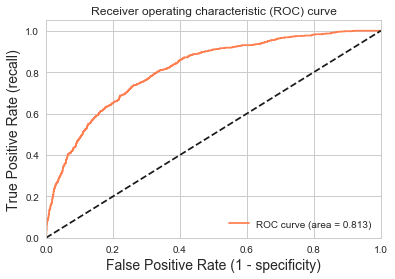

In [149]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [131]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [124]:
x_sm=sm.add_constant(x, prepend=False)

In [133]:
model=sm.Logit(y,x_sm)

In [134]:
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.455363
         Iterations 7


In [135]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             target_var   No. Observations:                 2983
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            7
Date:                Fri, 06 Apr 2018   Pseudo R-squ.:                  0.2248
Time:                        18:11:31   Log-Likelihood:                -1358.3
converged:                       True   LL-Null:                       -1752.2
                                        LLR p-value:                7.958e-166
==============================================================================================================================================================================
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
VAR_ca_score                                                                                                  -0.0011      0.000     -6.678      0.000      -0.001      -0.001
VAR_ctb_average_months_on_time_x_creditcard_loan_last_3months                                                 -0.2611      0.059     -4.454      0.000      -0.376      -0.146
VAR_Inverse_of_ratio_avg_months_30day_delinquent_last_6months_to_avg_months_30day_delinquent_last_18months    -0.0725      0.010     -7.160      0.000      -0.092      -0.053
VAR_Inverse_of_ctb_avg_months_90day_delinquent_last_18months                                                  -0.0319      0.005     -6.160      0.000      -0.042      -0.022
VAR_Log_of_ctb_avg_months_60day_delinquent_x_open_loan_x_personal_loan_last_6months                            0.3496      0.054      6.417      0.000       0.243       0.456
VAR_Log_of_avg_ratio_totaldebt_to_creditlimit_last_3months                                                     2.5785      0.461      5.592      0.000       1.675       3.482
VAR_Inverse_of_ctb_avg_months_90day_delinquent_x_overdraft_acct_last_6months                                  -0.0191      0.005     -4.133      0.000      -0.028      -0.010
const                                                                                                          2.1184      0.401      5.281      0.000       1.332       2.905
==============================================================================================================================================================================
"""